In [17]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("green_tripdata_2021-02.csv")

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.0,0.5,0.5,10.00,0.0,NaN,0.3,25.30,1.0,1.0,0.00
1,2.0,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.00
2,2.0,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.5,0.5,0.5,0.00,0.0,NaN,0.3,20.55,2.0,1.0,2.75
3,2.0,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.0,0.5,0.5,0.00,0.0,NaN,0.3,22.30,2.0,1.0,0.00
4,2.0,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.5,0.5,0.5,2.45,0.0,NaN,0.3,12.25,1.0,1.0,0.00


In [5]:
df.shape

(64572, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64572 entries, 0 to 64571
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               35463 non-null  float64
 1   lpep_pickup_datetime   64572 non-null  object 
 2   lpep_dropoff_datetime  64572 non-null  object 
 3   store_and_fwd_flag     35463 non-null  object 
 4   RatecodeID             35463 non-null  float64
 5   PULocationID           64572 non-null  int64  
 6   DOLocationID           64572 non-null  int64  
 7   passenger_count        35463 non-null  float64
 8   trip_distance          64572 non-null  float64
 9   fare_amount            64572 non-null  float64
 10  extra                  64572 non-null  float64
 11  mta_tax                64572 non-null  float64
 12  tip_amount             64572 non-null  float64
 13  tolls_amount           64572 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [7]:
corr = df.corr(method ='spearman')
corr

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.046921,0.024971,0.023925,0.023464,0.096976,0.021494,-0.160757,-0.046928,0.020069,0.058829,NaN,0.045207,0.031847,-0.028569,0.046847,0.003739
RatecodeID,0.046921,1.000000,0.076303,0.033440,0.083954,-0.078739,0.088438,-0.138006,-0.895216,-0.056013,-0.007427,NaN,-0.156759,0.045154,0.030676,0.916712,-0.081929
PULocationID,0.024971,0.076303,1.000000,0.134950,0.047816,0.167706,0.203143,0.108518,-0.149193,-0.063892,0.087715,NaN,-0.029204,0.198629,-0.028980,0.067703,0.004035
DOLocationID,0.023925,0.033440,0.134950,1.000000,0.009267,0.132023,0.082902,-0.003146,0.026319,0.102316,0.041645,NaN,-0.013832,0.116230,-0.079576,0.028456,0.374608
passenger_count,0.023464,0.083954,0.047816,0.009267,1.000000,0.055831,0.039039,0.025791,-0.077511,0.001315,0.015268,NaN,0.004178,0.035273,0.018485,0.093023,-0.004701
trip_distance,0.096976,-0.078739,0.167706,0.132023,0.055831,1.000000,0.811947,0.260645,-0.273135,-0.072201,0.413469,NaN,0.065275,0.821637,-0.155405,-0.091740,0.305647
fare_amount,0.021494,0.088438,0.203143,0.082902,0.039039,0.811947,1.000000,0.462468,-0.542415,-0.265054,0.382289,NaN,0.088083,0.979410,-0.208087,0.066828,0.246010
extra,-0.160757,-0.138006,0.108518,-0.003146,0.025791,0.260645,0.462468,1.000000,-0.701070,-0.403260,0.107574,NaN,0.079413,0.467752,-0.047922,-0.130346,0.151583
mta_tax,-0.046928,-0.895216,-0.149193,0.026319,-0.077511,-0.273135,-0.542415,-0.701070,1.000000,0.422513,-0.130726,NaN,0.089098,-0.506901,-0.051021,-0.882684,0.089401
tip_amount,0.020069,-0.056013,-0.063892,0.102316,0.001315,-0.072201,-0.265054,-0.403260,0.422513,1.000000,-0.114439,NaN,0.038012,-0.137891,-0.679175,-0.055817,0.345414


In [8]:
df = df.drop(columns=['ehail_fee'])

In [10]:
corr = df.corr(method ='spearman')

In [20]:
def heatmap(corr):
    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt="3.2f",
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

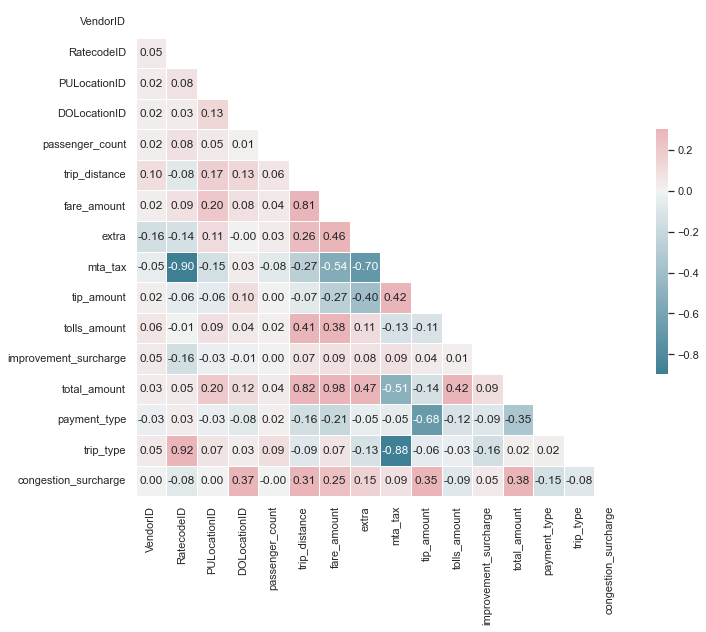

In [21]:
heatmap(corr)